In [1]:
!pip install git+https://github.com/pymc-devs/pymc3


  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-g5hv2_hh-build
    100% |████████████████████████████████| 3.1MB 262kB/s 
    100% |████████████████████████████████| 184kB 2.8MB/s 
    100% |████████████████████████████████| 51kB 3.1MB/s 
    100% |████████████████████████████████| 5.4MB 149kB/s 
  Running setup.py bdist_wheel for theano ... - \ | / done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d5/5b/93/433299b86e3e9b25f0f600e4e4ebf18e38eb7534ea518eba13
Successfully built theano
  Found existing installation: h5py 2.6.0
    Uninstalling h5py-2.6.0:
      Successfully uninstalled h5py-2.6.0
  Running setup.py install for pymc3 ... - \ | / done


In [15]:
!conda install -y mkl-service

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    mkl:         2017.0.3-0   defaults   
    mkl-service: 1.1.2-py36_3 defaults   

The following packages will be DOWNGRADED:

    numexpr:     2.6.2-py36_1 conda-forge --> 2.6.2-np112py36_nomkl_0 defaults [nomkl]






In [17]:
! rm -rf ~/.theano

In [31]:
%matplotlib inline


In [4]:
import pymc3 as pm
import numpy as np

In [53]:
times = np.array([
    38.791934232,
    39.507895388,
    38.748422097,
    38.737533137,
    39.027191614,
    38.838663019,
    38.875535168,
    38.690494589000004,
    38.78935919,
    38.908849132,
    38.971612778,
    39.571374240000004,
    39.284111162,
    39.398798678000006,
    38.838327949,
    38.61012127,
    39.010341231000005,
    38.494107153,
    39.268070398,
    38.750349974,
    38.665811636,
    38.861143107000004,
    38.535840869000005,
    38.899336959,
    38.89244867,
    39.017864536000005,
    39.116242686,
    39.055775633,
    38.805076181000004,
    38.873549585,
    39.065194186,
    38.876797642,
    38.671653445000004,
    38.833810291,
    39.006683587000005,
    38.684350229,
    38.607599687000004,
    38.975922201,
    38.530140886000005,
    61.122733176000004,
    61.376992129,
    60.902244678,
    61.013523472,
    61.549892798,
    63.284252776,
    63.267511367000004,
    62.999160905000004,
    63.251802096000006,
    63.115286728,
    63.636235646,
    63.850362522000005,
    63.774910001,
    63.992423905,
    63.198404154,
    63.332036039,
    63.20277498,
    63.275328203,
    63.010963969,
    63.00862406500001,
    83.535466219,
    84.34346552800001,
    84.744655361,
    83.58018820800001,
    83.42246955200001,
    83.083317328,
    83.543042345,
    83.59897468700001,
    83.278358388,
    83.34168158700001
])

ns = np.array([0] * 39 + [1] * 20 + [2] * 10)
cs = np.a
len(times), len(ns)

(69, 69)

In [54]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    overhead_mu = pm.Normal('overhead_mu', 100, 50)
    overhead_sd = pm.Normal('overhead_sd', 5, 5)
    generation_mu = pm.Normal('generation_mu', 100, 50)
    generation_sd = pm.Normal('generation_sd', 5, 5)
    time_sd = pm.Normal('time_sd', 5, 20)
    
    overhead = pm.Gamma('overhead', mu=overhead_mu, sd=overhead_sd)
    generation = pm.Gamma('generation', mu=generation_mu, sd=generation_sd)
    n = pm.Categorical('n', np.bincount(ns), observed=ns)
    time_mu = pm.Deterministic('time', overhead + n * generation)
    time_obs = pm.Gamma('time_obs', mu=time_mu, sd=time_sd, observed=times)
    
    expected_time = pm.Deterministic('expected_time', (overhead + 200 * generation) / 60)


In [55]:
with basic_model:
    trace = pm.sample(tune=2000, trace=[expected_time], )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 2496/2500 [00:36<00:00, 69.09it/s]/opt/conda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 104 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [00:36<00:00, 69.13it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f521ac72390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f51f7a8f550>]], dtype=object)

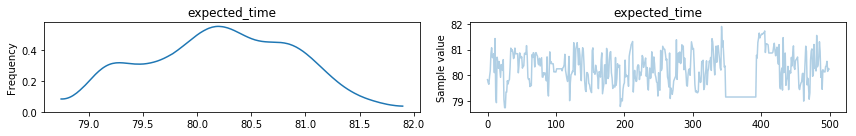

In [43]:
pm.traceplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51fdf22ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f51fddc4e80>]], dtype=object)

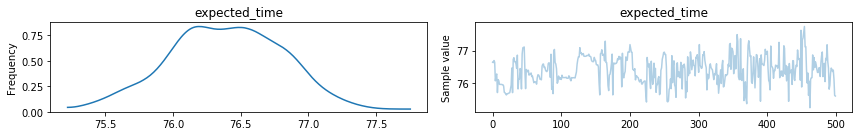

In [56]:
pm.traceplot(trace)